In [1]:
import pandas as pd
import keyring
import os
import requests
import json
import matplotlib.pyplot as plt

In [2]:
ipstack_key = keyring.get_password("webapi", "ipstack")
#ipstack_key

In [3]:
banlist_2021_09_11 = """
185.222.238.36 139.99.88.242 122.192.87.150 111.231.75.83 117.80.224.192 67.211.219.81 84.10.31.202 120.92.133.80 115.186.130.3 1.119.144.186 111.67.201.48 92.222.216.235 49.234.150.187 49.234.58.18 128.199.78.229 221.181.185.159 81.70.197.95 84.242.124.74 1.15.187.107 36.22.187.34 121.4.220.170 186.183.165.85 101.226.21.105 49.232.109.204 1.15.133.216 222.187.254.38 221.181.185.198 221.181.185.151 222.187.232.60 221.181.185.19 222.186.42.213 124.152.213.64 221.181.185.94 176.111.173.156 112.197.34.41 148.70.29.243 218.94.57.157 36.152.142.45 51.38.47.78 61.132.52.45 221.6.32.34 158.69.123.104 61.132.52.29 72.42.162.79 119.91.108.131 126.113.24.98 119.6.253.53 118.91.190.40 54.36.176.154 132.232.1.155 81.69.220.13 206.189.64.176 81.68.136.135 180.101.248.148 45.93.201.148 61.108.209.106 181.209.159.166 195.29.51.137 68.183.145.59 213.152.102.45 119.28.75.244 104.225.147.212 89.19.176.46 222.187.254.41 184.22.122.93 200.195.169.59 141.95.5.226 78.31.91.98 157.245.216.88 1.56.207.130 180.76.143.216 153.127.56.7 106.13.19.118 189.8.68.56 200.116.110.25 82.64.46.144 165.169.241.28 49.234.134.53 51.68.71.184 1.179.157.230 51.159.67.81 177.202.61.70 51.158.124.238 118.26.65.250 157.230.153.75 61.138.100.126 186.4.136.153 178.62.2.24 101.89.189.53 119.92.70.82 123.131.165.105 106.52.187.68 180.102.133.99 125.76.228.194 192.210.206.219 152.32.212.72 79.10.81.238 45.173.28.1 49.234.109.61 116.153.2.143 20.52.60.16 1.116.214.14 179.43.176.31 186.182.55.9 192.241.182.13 120.48.14.240 14.23.44.10 112.160.220.233 160.153.251.21 179.27.60.34 91.168.132.219 221.181.185.223 221.131.165.56 162.243.193.216 188.6.161.77 138.68.22.80 115.227.129.87 177.136.39.254 222.187.227.122 111.20.10.5 157.230.144.155 174.137.62.137 218.4.234.74 177.53.68.102 187.189.125.31 160.16.58.173 178.62.80.236 106.13.18.86 113.31.119.233 202.88.150.77 20.52.60.217 187.130.240.237 93.108.233.162 165.232.105.80 82.99.229.34 125.20.32.22 81.68.67.173 222.128.45.5 36.99.40.139 77.52.12.151 81.69.242.220 148.72.65.173 58.246.125.198 36.91.38.31 163.172.121.98 223.255.28.203 186.103.239.190 37.130.113.56 196.1.114.22 119.28.77.175 118.24.119.36 113.168.165.26 46.101.123.135 115.159.92.44 161.117.226.71 121.4.142.38 153.127.70.188 167.71.170.179 122.51.248.76 43.129.233.101 72.136.140.167 194.152.214.252 111.230.203.4 190.185.232.180 157.230.12.188 42.192.48.55 211.253.133.48 187.106.203.217 81.68.255.197 104.236.21.175 167.99.1.123 42.192.170.39 62.171.190.84 99.229.36.82 180.76.124.53 187.136.108.229 142.93.245.183 106.75.138.11 123.129.65.246 50.115.174.103 45.155.204.39 60.250.164.169 106.248.228.114 114.254.3.157 116.228.196.210 81.68.217.130 81.70.160.145 181.199.122.86 39.129.9.180 95.53.254.6 46.242.131.56 178.22.121.146 198.23.148.137 113.81.197.123 112.198.43.130 116.227.223.114 187.73.241.162 114.84.211.191 45.134.171.77 14.139.186.168 159.89.115.75 203.119.114.221 183.6.114.214 201.99.120.13 183.62.69.211 49.233.105.223 81.69.253.29 187.72.177.131 218.25.130.220 198.46.152.121 213.158.29.179 185.116.97.203 148.70.110.75 107.170.153.57 148.235.82.68 121.5.226.94 177.92.16.186 103.44.20.100 51.15.7.16 150.158.192.143 103.18.247.176 106.75.57.20 160.153.234.236 5.206.224.123 190.15.222.52 60.249.82.121 111.229.116.169 107.189.3.220 106.75.10.157 134.17.16.134 121.4.89.155 218.29.196.186 88.247.78.116 152.136.102.64 103.145.62.177 23.102.67.201 114.67.179.239 42.192.220.183 142.93.172.70 142.93.252.60 61.102.42.5 200.196.230.126 117.197.142.169 116.90.1.141 91.121.11.44 121.5.243.95 121.166.245.200 114.67.219.159 149.129.237.83 152.136.25.133 40.115.187.98 115.159.120.142 34.121.241.35 82.156.57.208 194.170.156.9 159.203.68.197 2.236.108.242 188.166.11.150 197.3.6.178 177.189.244.193 116.246.20.2 103.122.5.194 5.196.73.76 49.232.221.244 60.30.111.18 139.198.179.46 77.37.248.144 81.68.138.6 190.210.182.179 159.65.91.105 194.163.137.85 211.234.119.189 36.133.45.135 103.45.141.154 1.117.157.160 49.234.93.52 165.227.176.221 206.189.97.12 153.37.214.220 91.144.135.82 34.75.43.102 117.114.138.246 58.22.61.212 106.52.114.92 106.13.74.61 115.159.67.187 1.15.86.33 51.15.229.198 186.215.206.155 189.139.28.162 203.245.41.96 119.29.183.138 208.109.13.144 119.84.122.107 107.175.33.240 122.154.72.102 182.162.88.9 49.232.106.184 46.101.138.138 160.16.151.108 121.4.47.236 189.4.128.122 170.106.151.247 185.207.232.232 81.16.122.128 81.68.126.192 188.166.115.126 153.126.212.95 115.159.63.123 114.67.103.210 124.133.52.153 187.149.68.191 120.48.16.217 110.10.176.41 190.24.6.162 23.31.122.1 221.224.251.178 106.13.105.95 200.69.141.210 146.247.178.98 164.90.134.223 152.136.176.36 117.50.29.136 104.37.187.106 157.230.100.192 81.71.28.229 181.48.134.66 112.166.133.216 107.189.6.236 1.237.57.21 58.220.10.210 202.4.42.154 23.25.61.202 5.61.246.184 49.234.91.217 81.69.255.211 118.89.82.212 106.75.129.214 118.34.12.117 134.122.90.115 128.199.162.108 180.76.232.66 180.76.56.138 51.105.5.16 200.53.221.98 106.75.110.207 36.133.170.229 115.159.93.156 61.7.240.182 121.4.49.146 81.69.12.243 81.68.163.129 129.226.226.39 190.202.147.253 180.76.141.204 164.90.155.117 64.89.119.126 35.199.93.228 175.24.103.72 81.68.232.133 42.192.186.106 1.15.234.171 180.76.37.181 118.27.11.126 121.4.58.192 106.12.201.246 112.175.92.198 36.37.122.43 62.33.191.134 84.180.235.36 181.188.186.158 191.253.32.69 93.186.198.72 81.70.164.173 112.196.85.235 5.200.52.109 182.72.54.146 45.120.69.219 24.172.3.62 187.189.170.122 192.241.172.175 107.170.131.23 119.28.118.4 217.93.165.120 122.51.101.136 163.172.177.22 84.82.130.211 37.139.9.20 82.65.173.65 45.62.240.116 201.217.195.226 117.173.153.34 121.120.80.170 194.152.206.17 121.196.44.230 190.129.69.101 119.98.190.49 142.93.179.2 58.57.15.29 178.128.212.164 131.72.69.106
"""
banlist = sorted([x.strip() for x in banlist_2021_09_11.split(' ')])
len(banlist)

401

In [4]:
#req = requests.get(f"http://api.ipstack.com/2601:642:4300:34f:28d5:5193:ad27:c2e7?access_key={ipstack_key}")

In [5]:
#req.status_code

In [6]:
#json.loads(req.text)

In [7]:
def ipinfo(ip):
    global ipstack_key
    req = requests.get(f"http://api.ipstack.com/{ip}?access_key={ipstack_key}")
    data = None
    if req.status_code == 200:
        data = json.loads(req.text)
    return data

In [8]:
datfile = "attack-ipinfos.dat"
if os.path.isfile(datfile):
    with open(datfile, "rt") as f:
        infos = json.load(f)
else:
    infos = {}
for ip in banlist:
    if not ip in infos:
        print(f"fetch {ip}")
        infos[ip] = ipinfo(ip)
with open(datfile, "wt") as f:
    json.dump(infos, f)

fetch 1.15.234.171
fetch 1.237.57.21
fetch 104.37.187.106
fetch 106.12.201.246
fetch 106.75.110.207
fetch 106.75.129.214
fetch 107.170.131.23
fetch 107.189.6.236
fetch 112.166.133.216
fetch 112.175.92.198
fetch 112.196.85.235
fetch 115.159.93.156
fetch 117.173.153.34
fetch 117.50.29.136
fetch 118.27.11.126
fetch 118.34.12.117
fetch 118.89.82.212
fetch 119.28.118.4
fetch 119.98.190.49
fetch 121.120.80.170
fetch 121.196.44.230
fetch 121.4.49.146
fetch 121.4.58.192
fetch 122.51.101.136
fetch 128.199.162.108
fetch 129.226.226.39
fetch 131.72.69.106
fetch 134.122.90.115
fetch 142.93.179.2
fetch 146.247.178.98
fetch 152.136.176.36
fetch 157.230.100.192
fetch 163.172.177.22
fetch 164.90.134.223
fetch 164.90.155.117
fetch 175.24.103.72
fetch 178.128.212.164
fetch 180.76.141.204
fetch 180.76.232.66
fetch 180.76.37.181
fetch 180.76.56.138
fetch 181.188.186.158
fetch 181.48.134.66
fetch 182.72.54.146
fetch 187.189.170.122
fetch 190.129.69.101
fetch 190.202.147.253
fetch 191.253.32.69
fetch 192.24

In [9]:
data = []
cols = ['ip', 'continent_code', 'country_code', 'city', 'latitude', 'longitude']
for k in infos:
    v = infos[k]
    data.append([v[col] for col in cols])
df = pd.DataFrame(columns=cols, data=data)

In [10]:
df = df.sort_values(['continent_code', 'country_code', 'city', 'ip'])
df

,ip,continent_code,country_code,city,latitude,longitude
38,165.169.241.28,AF,RE,Le Port,-20.938330,55.304722
203,197.3.6.178,AF,TN,Tunis,36.798000,10.171700
201,194.170.156.9,AS,AE,Abu Dhabi,24.470280,54.372780
98,1.116.214.14,AS,CN,Beijing,39.911758,116.379227
269,1.117.157.160,AS,CN,Beijing,39.911758,116.379227
...,...,...,...,...,...,...
360,181.48.134.66,SA,CO,Palmira,3.543950,-76.187180
182,181.199.122.86,SA,EC,Guayaquil,-2.195000,-79.900002
49,186.4.136.153,SA,EC,Quito,-0.223200,-78.512703
179,179.27.60.34,SA,UY,Montevideo,-34.883999,-56.162998


In [11]:
len(df)

401

In [12]:
df[df.continent_code=='NA']

,ip,continent_code,country_code,city,latitude,longitude
37,158.69.123.104,NA,CA,Montréal,45.502079,-73.562012
251,72.136.140.167,NA,CA,Tillsonburg,42.879971,-80.752533
162,159.89.115.75,NA,CA,Toronto,43.703171,-79.512192
268,99.229.36.82,NA,CA,Toronto,43.703171,-79.512192
381,45.62.240.116,NA,CA,Waterloo,43.461342,-80.507004
45,181.209.159.166,NA,GT,Guatemala City,14.624800,-90.532799
298,189.139.28.162,NA,MX,Cuautitlán Izcalli,19.615601,-99.204597
189,187.130.240.237,NA,MX,Cuencame,24.868759,-103.696793
296,187.149.68.191,NA,MX,Culiacán,24.805370,-107.397011
190,187.136.108.229,NA,MX,Heroica Matamoros,25.826349,-97.521080


In [13]:
myloc = { "latitude": [37.62757873535156], "longitude": [-122.05397033691406] }

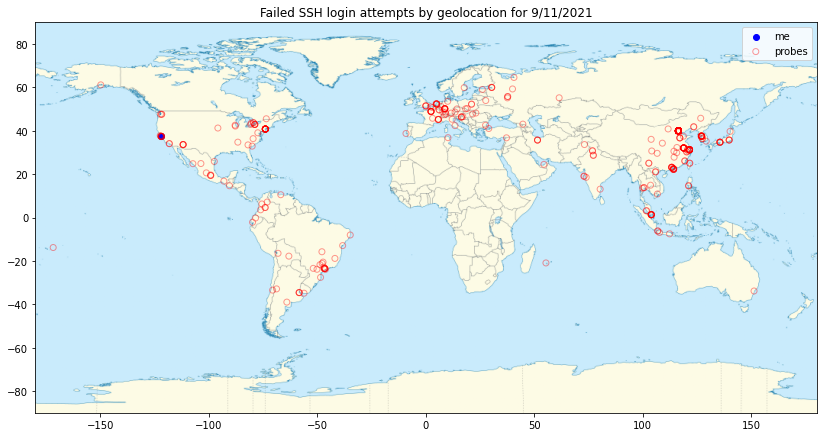

In [14]:
plt.figure(figsize=[14,10])
im = plt.imread('./World_location_map_(equirectangular_180).png')
plt.imshow(im, zorder=0, extent=[-180,180,-90,90])
plt.scatter(myloc['longitude'], myloc['latitude'], c='b', label="me")
plt.scatter(df['longitude'], df['latitude'], alpha=0.4, edgecolors='r', facecolors='none', label="probes")
plt.title("Failed SSH login attempts by geolocation for 9/11/2021")
plt.legend()